<a href="https://colab.research.google.com/github/Huzefah-tech/Latihan_Python/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

np.random.seed(42)

data1 = {
    'ID' : range(1, 21),
    'Usia': np.random.randint(20, 50, 20).astype(float), #Float agar bisa NaN
    'Gaji': np.random.randint(3000, 10000, 20).astype(float),
    'Pengalaman': np.random.randint(1, 15, 20).astype(float)
}

df1 = pd.DataFrame(data1)

df1.loc[5, 'Usia'] = np.nan
df1.loc[5, 'Gaji'] = np.nan
df1.loc[5, 'Pengalaman'] = np.nan

#Tambahkan duplicate rows
df1 = pd.concat([df1, df1.iloc[[2,5]]], ignore_index=True)

print("=== Data 1 ===")
print(df1)

=== Data 1 ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3    4  34.0  8611.0        14.0
4    5  30.0  9949.0        14.0
5    6   NaN     NaN         NaN
6    7  48.0  8311.0        12.0
7    8  40.0  8051.0         7.0
8    9  26.0  9420.0         4.0
9   10  45.0  4184.0         9.0
10  11  38.0  7555.0         3.0
11  12  42.0  6385.0         5.0
12  13  30.0  7117.0         3.0
13  14  30.0  9396.0         7.0
14  15  43.0  7843.0         5.0
15  16  40.0  5904.0         9.0
16  17  23.0  3474.0         7.0
17  18  27.0  4082.0         2.0
18  19  43.0  5558.0         4.0
19  20  22.0  5047.0         9.0
20   3  48.0  5391.0        14.0
21   6   NaN     NaN         NaN


In [8]:
#Dataset kedua untuk integrasi
data2 = {
    'ID': range(5, 25), #Overlap sebagian dengan Data1
    'Dept': np.random.choice(['IT', 'HR', 'Finance', 'Marketing'], 20)
}
df2 = pd.DataFrame(data2)

print("\n=== Data 2 ===")
print(df2.head())

=== Data 1 ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3    4  34.0  8611.0        14.0
4    5  30.0  9949.0        14.0
5    6   NaN     NaN         NaN
6    7  48.0  8311.0        12.0
7    8  40.0  8051.0         7.0
8    9  26.0  9420.0         4.0
9   10  45.0  4184.0         9.0
10  11  38.0  7555.0         3.0
11  12  42.0  6385.0         5.0
12  13  30.0  7117.0         3.0
13  14  30.0  9396.0         7.0
14  15  43.0  7843.0         5.0
15  16  40.0  5904.0         9.0
16  17  23.0  3474.0         7.0
17  18  27.0  4082.0         2.0
18  19  43.0  5558.0         4.0
19  20  22.0  5047.0         9.0
20   3  48.0  5391.0        14.0
21   6   NaN     NaN         NaN
22   3  48.0  5391.0        14.0
23   6   NaN     NaN         NaN

=== Data 2 ===
   ID       Dept
0   5  Marketing
1   6         HR
2   7         HR
3   8         HR
4   9         IT


In [12]:
#CEK MISSING & DUPLICATE DATA

print("\n=== DATA 1 (df1) ===")
#1. cek missing values per kolom
print("\n=== Cek Missing Values ===")
print(df1.isnull().sum())

# 2. Cek jumlah total missing values
print("\n=== Cek Total Missing Values :", df1.isnull().sum().sum())

# 3. Tampilkan baris yang missing values (jika ada)
print("\n=== Baris yang Mengandung Missing Values ===")
missing_rows = df1[df1.isnull().any(axis=1)]
print(missing_rows)

print("\n=== DATA 2 (df2) ===")


# 4. Cek missing values per kolom
print("\n=== Cek Missing Values :")
print(df2.isnull().sum())

# 5. Cek jumlah total missing values
print("\n=== Cek Total Missing Values :", df2.isnull().sum().sum())

# 6. Tampilkan baris yang missing values (jika ada)
print("\n Baris yang Mengandung Missing Values :")
missing_rows = df2[df2.isnull().any(axis=1)]
print(missing_rows)


=== DATA 1 (df1) ===

=== Cek Missing Values ===
ID            0
Usia          3
Gaji          3
Pengalaman    3
dtype: int64

=== Cek Total Missing Values : 9

=== Baris yang Mengandung Missing Values ===
    ID  Usia  Gaji  Pengalaman
5    6   NaN   NaN         NaN
21   6   NaN   NaN         NaN
23   6   NaN   NaN         NaN

=== DATA 2 (df2) ===

=== Cek Missing Values :
ID      0
Dept    0
dtype: int64

=== Cek Total Missing Values : 0

 Baris yang Mengandung Missing Values :
Empty DataFrame
Columns: [ID, Dept]
Index: []


In [13]:
# CEK DUPLICATE DATA (Data1)

print("\n=== DATA 1 (df1) ===")

# 1. Cek duplicate data (boolean per baris)
print("\n=== Cek Duplicate Data (boolean):")
print(df1.duplicated())

# 2. Hitung jumlah baris duplikat
print("\n=== Jumlah baris duplikat :", df1.duplicated().sum())

# 3. Tampilkan baris duplikat (jika ada)\
print("\n=== Baris duplikat :")
print(df1[df1.duplicated()])


=== DATA 1 (df1) ===

=== Cek Duplicate Data (boolean):
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
dtype: bool

=== Jumlah baris duplikat : 4

=== Baris duplikat :
    ID  Usia    Gaji  Pengalaman
20   3  48.0  5391.0        14.0
21   6   NaN     NaN         NaN
22   3  48.0  5391.0        14.0
23   6   NaN     NaN         NaN


In [14]:
# CEK DUPLICATE DATA (Data 2)
print("\n=== DATA 2 (df2) ===")

# 1. Cek duplicate data (boolean per baris)
print("\n Cek duplicate Data (boolean): ")
print("df2.duplicated()")

# 2. Hitung jumlah baris duplikat
print("\n Jumlah baris duplikat: ")
print("df2.duplicated().sum()")

# 3. Tampilkan baris duplikat (jika ada)
print("\n Baris duplikat: ")
print("df2[df2.duplicated()]")



=== DATA 2 (df2) ===

 Cek duplicate Data (boolean): 
df2.duplicated()

 Jumlah baris duplikat: 
df2.duplicated().sum()

 Baris duplikat: 
df2[df2.duplicated()]


In [15]:
# PEMBERSIHAN MISSING DATA

print("\n=== Data 1 sebelum pembersihan missing ===")
print(df1)
print("\n Total Missing Values: ", df1.isnull(). sum().sum())

# Bersihkan missing dengan dropna (hapus baris yang ada NaN)
df1_clean = df1.dropna()
print("\n=== Data 1 setelah pembersihan missing ===")
print(df1_clean)
print("\n Total Missing Values: ", df1_clean.isnull(). sum().sum())


=== Data 1 sebelum pembersihan missing ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3    4  34.0  8611.0        14.0
4    5  30.0  9949.0        14.0
5    6   NaN     NaN         NaN
6    7  48.0  8311.0        12.0
7    8  40.0  8051.0         7.0
8    9  26.0  9420.0         4.0
9   10  45.0  4184.0         9.0
10  11  38.0  7555.0         3.0
11  12  42.0  6385.0         5.0
12  13  30.0  7117.0         3.0
13  14  30.0  9396.0         7.0
14  15  43.0  7843.0         5.0
15  16  40.0  5904.0         9.0
16  17  23.0  3474.0         7.0
17  18  27.0  4082.0         2.0
18  19  43.0  5558.0         4.0
19  20  22.0  5047.0         9.0
20   3  48.0  5391.0        14.0
21   6   NaN     NaN         NaN
22   3  48.0  5391.0        14.0
23   6   NaN     NaN         NaN

 Total Missing Values:  9

=== Data 1 setelah pembersihan missing ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0       

In [16]:
# PENANGAN DUPLICATE DATA (df1)

print("\n=== Data 1 sebelum pembersihan duplicate ===")
print(df1_clean)
print("\n Jumlah baris duplikat sebelum dibersihkan: ", df1_clean.duplicated().sum())

# Hapus baris duplikat
df1_final = df1_clean.drop_duplicates()
print("\n=== Data 1 setelah pembersihan duplicate ===")
print(df1_final)
print("\n Jumlah baris duplikat setelah dibersihkan: ", df1_final.duplicated().sum())


=== Data 1 sebelum pembersihan duplicate ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3    4  34.0  8611.0        14.0
4    5  30.0  9949.0        14.0
6    7  48.0  8311.0        12.0
7    8  40.0  8051.0         7.0
8    9  26.0  9420.0         4.0
9   10  45.0  4184.0         9.0
10  11  38.0  7555.0         3.0
11  12  42.0  6385.0         5.0
12  13  30.0  7117.0         3.0
13  14  30.0  9396.0         7.0
14  15  43.0  7843.0         5.0
15  16  40.0  5904.0         9.0
16  17  23.0  3474.0         7.0
17  18  27.0  4082.0         2.0
18  19  43.0  5558.0         4.0
19  20  22.0  5047.0         9.0
20   3  48.0  5391.0        14.0
22   3  48.0  5391.0        14.0

 Jumlah baris duplikat sebelum dibersihkan:  2

=== Data 1 setelah pembersihan duplicate ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3 

In [17]:
# INTEGRASI DATA (df1_final & df2)

print("\n=== Data 1 Final (bersih) ===")
print(df1_final)

print("\n=== Data 2 (df2) ===")
print(df2)


=== Data 1 Final (bersih) ===
    ID  Usia    Gaji  Pengalaman
0    1  26.0  4685.0        12.0
1    2  39.0  3769.0        12.0
2    3  48.0  5391.0        14.0
3    4  34.0  8611.0        14.0
4    5  30.0  9949.0        14.0
6    7  48.0  8311.0        12.0
7    8  40.0  8051.0         7.0
8    9  26.0  9420.0         4.0
9   10  45.0  4184.0         9.0
10  11  38.0  7555.0         3.0
11  12  42.0  6385.0         5.0
12  13  30.0  7117.0         3.0
13  14  30.0  9396.0         7.0
14  15  43.0  7843.0         5.0
15  16  40.0  5904.0         9.0
16  17  23.0  3474.0         7.0
17  18  27.0  4082.0         2.0
18  19  43.0  5558.0         4.0
19  20  22.0  5047.0         9.0

=== Data 2 (df2) ===
    ID       Dept
0    5  Marketing
1    6         HR
2    7         HR
3    8         HR
4    9         IT
5   10         HR
6   11         IT
7   12         HR
8   13  Marketing
9   14  Marketing
10  15    Finance
11  16  Marketing
12  17    Finance
13  18  Marketing
14  19         IT

In [18]:
# Integrasi dengan join berdasarkan kolom 'ID'
df_integrated = pd.merge(df1_final, df2, on='ID', how='inner')

print("\n=== Hasil Integrasi Data (Inner Join berdasarkan ID) ===")
print(df_integrated)


=== Hasil Integrasi Data (Inner Join berdasarkan ID) ===
    ID  Usia    Gaji  Pengalaman       Dept
0    5  30.0  9949.0        14.0  Marketing
1    7  48.0  8311.0        12.0         HR
2    8  40.0  8051.0         7.0         HR
3    9  26.0  9420.0         4.0         IT
4   10  45.0  4184.0         9.0         HR
5   11  38.0  7555.0         3.0         IT
6   12  42.0  6385.0         5.0         HR
7   13  30.0  7117.0         3.0  Marketing
8   14  30.0  9396.0         7.0  Marketing
9   15  43.0  7843.0         5.0    Finance
10  16  40.0  5904.0         9.0  Marketing
11  17  23.0  3474.0         7.0    Finance
12  18  27.0  4082.0         2.0  Marketing
13  19  43.0  5558.0         4.0         IT
14  20  22.0  5047.0         9.0  Marketing


In [19]:
# Jika ingin integrasi lengkap (semua data, meski tidak cocok ID)
df_full = pd.merge(df1_final, df2, on='ID', how='outer')

print("\n=== Hasil Integrasi Data (Outer Join berdasarkan ID) ===")
print(df_full)


=== Hasil Integrasi Data (Outer Join berdasarkan ID) ===
    ID  Usia    Gaji  Pengalaman       Dept
0    1  26.0  4685.0        12.0        NaN
1    2  39.0  3769.0        12.0        NaN
2    3  48.0  5391.0        14.0        NaN
3    4  34.0  8611.0        14.0        NaN
4    5  30.0  9949.0        14.0  Marketing
5    6   NaN     NaN         NaN         HR
6    7  48.0  8311.0        12.0         HR
7    8  40.0  8051.0         7.0         HR
8    9  26.0  9420.0         4.0         IT
9   10  45.0  4184.0         9.0         HR
10  11  38.0  7555.0         3.0         IT
11  12  42.0  6385.0         5.0         HR
12  13  30.0  7117.0         3.0  Marketing
13  14  30.0  9396.0         7.0  Marketing
14  15  43.0  7843.0         5.0    Finance
15  16  40.0  5904.0         9.0  Marketing
16  17  23.0  3474.0         7.0    Finance
17  18  27.0  4082.0         2.0  Marketing
18  19  43.0  5558.0         4.0         IT
19  20  22.0  5047.0         9.0  Marketing
20  21   NaN     N

In [20]:
# CEK KEBUTUHAN TRANSFORMASI

print("\n=== Hasil Integrasi Data (df_integrated) ===")
print(df_integrated.head())

# 1. Info tipe data
print("\n=== Info Tipe Data ===")
print(df_integrated.dtypes)

# 2. Cek missing values
print("\n=== Cek Missing Values ===")
print(df_integrated.isnull().sum())

# 3. Cek distribusi numerik (apakah perlu normalisasi/standarisasi)
print("\n=== Statistik Deskriptif Kolom Numerik ===")
print(df_integrated.describe())


=== Hasil Integrasi Data (df_integrated) ===
   ID  Usia    Gaji  Pengalaman       Dept
0   5  30.0  9949.0        14.0  Marketing
1   7  48.0  8311.0        12.0         HR
2   8  40.0  8051.0         7.0         HR
3   9  26.0  9420.0         4.0         IT
4  10  45.0  4184.0         9.0         HR

=== Info Tipe Data ===
ID              int64
Usia          float64
Gaji          float64
Pengalaman    float64
Dept           object
dtype: object

=== Cek Missing Values ===
ID            0
Usia          0
Gaji          0
Pengalaman    0
Dept          0
dtype: int64

=== Statistik Deskriptif Kolom Numerik ===
              ID       Usia         Gaji  Pengalaman
count  15.000000  15.000000    15.000000   15.000000
mean   12.933333  35.133333  6818.400000    6.666667
std     4.589844   8.609519  2070.284549    3.457222
min     5.000000  22.000000  3474.000000    2.000000
25%     9.500000  28.500000  5302.500000    4.000000
50%    13.000000  38.000000  7117.000000    7.000000
75%    16.50

In [22]:
# TRANSFORMASI DATA

from sklearn.preprocessing import StandardScaler, LabelEncoder

df_transformed = df_integrated.copy()

# A. Encoding kolom kategorikal (contoh: 'Dept')
if df_transformed['Dept'].dtype == 'object':
    le = LabelEncoder()
    df_transformed['Dept'] = le.fit_transform(df_transformed['Dept'])
    print("\n Kolom 'Dept' berhasil ditransformasi (Label Encoding).")

# B. Normalisasi/Standarisasi kolom numerik (contoh: 'Usia' dan 'Gaji')
scaler = StandardScaler()
df_transformed[['Usia', 'Gaji']] = scaler.fit_transform(df_transformed[['Usia', 'Gaji']])
print("\n=== Data Setelah Transformasi ===")
print(df_transformed.head())


 Kolom 'Dept' berhasil ditransformasi (Label Encoding).

=== Data Setelah Transformasi ===
   ID      Usia      Gaji  Pengalaman  Dept
0   5 -0.617166  1.565234        14.0     3
1   7  1.546923  0.746268        12.0     1
2   8  0.585106  0.616274         7.0     1
3   9 -1.098075  1.300745         4.0     2
4  10  1.186242 -1.317144         9.0     1



=== Matriks Korelasi ===
                  ID      Usia      Gaji  Pengalaman      Dept
ID          1.000000 -0.316084 -0.667844   -0.438135  0.150259
Usia       -0.316084  1.000000  0.094351    0.133586 -0.425587
Gaji       -0.667844  0.094351  1.000000    0.230250  0.170654
Pengalaman -0.438135  0.133586  0.230250    1.000000  0.006119
Dept        0.150259 -0.425587  0.170654    0.006119  1.000000


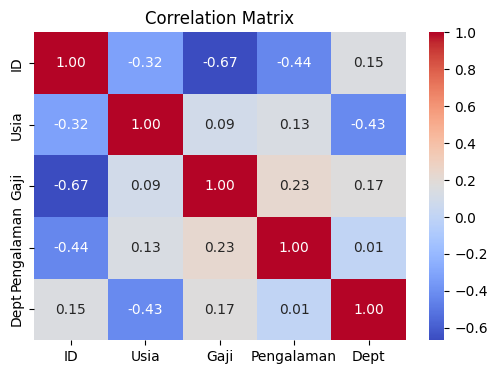


 Fitur yang dibuang karena korelasi tinggi:  []

=== Data Setelah Reduksi Korelasi ===
   ID      Usia      Gaji  Pengalaman  Dept
0   5 -0.617166  1.565234        14.0     3
1   7  1.546923  0.746268        12.0     1
2   8  0.585106  0.616274         7.0     1
3   9 -1.098075  1.300745         4.0     2
4  10  1.186242 -1.317144         9.0     1


In [24]:
import seaborn  as sns
import matplotlib.pyplot as plt

# Hitung Korelasi antar kolom numerik
corr = df_transformed.corr()

print("\n=== Matriks Korelasi ===")
print(corr)

#Visualisasi Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Buang fitur jika korelasi terlalu tinggi (contoh thresold 0.85)
threshold = 0.85
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print("\n Fitur yang dibuang karena korelasi tinggi: ", to_drop)

df_reduced_corr = df_transformed.drop(columns=to_drop)
print("\n=== Data Setelah Reduksi Korelasi ===")
print(df_reduced_corr.head())



In [25]:
import pandas as pd

# Contoh data asli sebelum scalling (gantilah dengan df1 atau dataframe mentahmu)
df_asli = df1.copy()

# === Diskritasi Usia ===
df_asli['Usia_Group'] = pd.cut(
    df_asli['Usia'],
    bins=[0, 25, 40, 100], # Interval Usia
    labels=['Muda', 'Dewasa', 'Tua']
)

# === Diskripsi Gaji ===
df_asli['Gaji_Group'] = pd.cut(
    df_asli['Gaji'],
    bins=[0, 5000, 10000, 20000], # Interval Gaji (contoh: ribuan)
    labels=['Rendah', 'Menengah', 'Tinggi']
)

# === Diskritisasi Pengalaman ===
df_asli['Pengalaman_Group'] = pd.cut(
    df_asli['Pengalaman'],
    bins=[0, 5, 10, 30], # Interval Pengalaman Kerja (contoh: tahun)
    labels=['Pemula', 'Menengah', 'Senior']
)

print("\n === Data Setelah Diskritasi ===")
print(df_asli[['Usia', 'Usia_Group', 'Gaji', 'Gaji_Group', 'Pengalaman', 'Pengalaman_Group']])


 === Data Setelah Diskritasi ===
    Usia Usia_Group    Gaji Gaji_Group  Pengalaman Pengalaman_Group
0   26.0     Dewasa  4685.0     Rendah        12.0           Senior
1   39.0     Dewasa  3769.0     Rendah        12.0           Senior
2   48.0        Tua  5391.0   Menengah        14.0           Senior
3   34.0     Dewasa  8611.0   Menengah        14.0           Senior
4   30.0     Dewasa  9949.0   Menengah        14.0           Senior
5    NaN        NaN     NaN        NaN         NaN              NaN
6   48.0        Tua  8311.0   Menengah        12.0           Senior
7   40.0     Dewasa  8051.0   Menengah         7.0         Menengah
8   26.0     Dewasa  9420.0   Menengah         4.0           Pemula
9   45.0        Tua  4184.0     Rendah         9.0         Menengah
10  38.0     Dewasa  7555.0   Menengah         3.0           Pemula
11  42.0        Tua  6385.0   Menengah         5.0           Pemula
12  30.0     Dewasa  7117.0   Menengah         3.0           Pemula
13  30.0     D